In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """This is a function that we are going to sample from."""
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1)**3)

In [3]:
def g(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi) * sigma * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

## Target Distribution

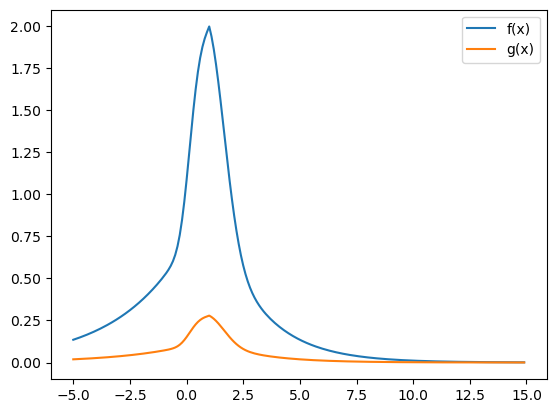

In [4]:
NORM_DIST = 7.16556

X_i = np.arange(-5, 15, 0.1)
F_i = [f(x) for x in X_i]
P_i = [f/NORM_DIST for f in F_i]

plt.plot(X_i, F_i)
plt.plot(X_i, P_i)
plt.legend(['f(x)', 'g(x)'])

## Accept-Reject: N(0, 3)

In [6]:
samples = []
N = 100000
M = 100

for i in range(N):
    # sample a candidate
    candidate = np.random.normal(0, 3)
    
    # calculate the probability of accepting the candidate
    prob_accept = f(candidate) / (M * g(candidate, 0, 3))
    
    # accept with the calculated probability
    if np.random.rand() < prob_accept:
        samples.append(candidate)

In [7]:
print(f"Candidate count: {len(samples)}")

Candidate count: 755


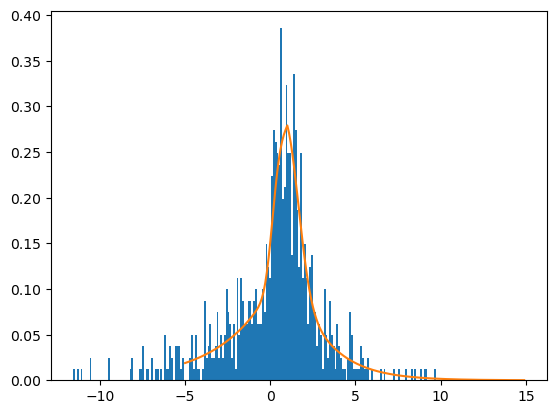

In [16]:
plt.hist(samples, bins=200, density=True)
plt.plot(X_i, [f/NORM_DIST for f in F_i])

## Metropolis

In [17]:
samples = [1]
num_accept = 0

for i in range(N):
    # sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 4)
    
    # calculate the probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))
    
    # accept with the given probability
    if np.random.rand() < prob:
        samples.append(candidate)
        num_accept += 1
    else:
        samples.append(samples[-1])

In [18]:
print(f"Candidate count: {len(samples)}")

Candidate count: 100001


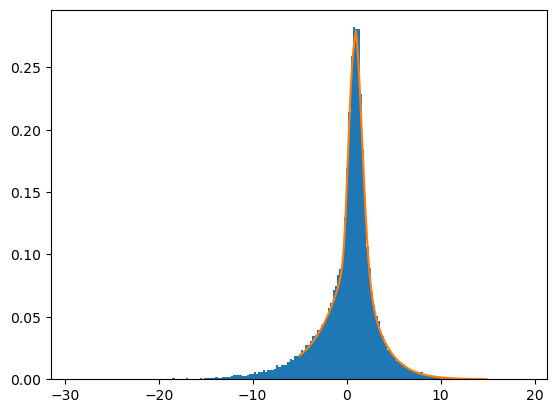

In [19]:
plt.hist(samples, bins=200, density=True)
plt.plot(X_i, [f/NORM_DIST for f in F_i])

In [22]:
print(f"Acceptence ratio: {num_accept/N}")

Acceptence ratio: 0.48691
